In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial' +\
                                        '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial' +\
                                        '/master/dataset/winequality-white.csv'
red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
red_wine['color'] = 1
white_wine['color'] = 0
wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [7]:
import plotly.express as px
fig = px.histogram(wine, x='quality')
fig.show()

In [8]:
fig = px.histogram(wine, x = 'quality', color = 'color')
fig.show()

In [9]:
X = wine.drop(['color'], axis = 1)
y = wine['color']

In [10]:
from sklearn.model_selection import train_test_split 
import numpy as np 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
np.unique(y_train, return_counts = True)

(array([0, 1]), array([3913, 1284]))

In [11]:
import plotly.graph_objects as go   
fig = go.Figure()
fig.add_trace(go.Histogram(x = X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x = X_test['quality'], name = 'Test'))
fig.update_layout(barmode = 'overlay')
fig.update_traces(opacity = 0.75)
fig.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier 
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [13]:
from sklearn.metrics import accuracy_score
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc:  0.9569230769230769


In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y = X['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X['quality'], name = 'quality'))

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)
X_ss_pd = pd.DataFrame(X_ss, columns = X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns = X.columns)

In [16]:
fig = go.Figure()
fig.add_trace(go.Box(y = X_mms_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X_mms_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X_mms_pd['quality'], name = 'quality'))

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(y = X_ss_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X_ss_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X_ss_pd['quality'], name = 'quality'))
fig.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size = 0.2, random_state = 13)
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train_acc', accuracy_score(y_train, y_pred_tr))
print('Test Acc', accuracy_score(y_test, y_pred_test))

Train_acc 0.9553588608812776
Test Acc 0.9569230769230769


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size = 0.2, random_state = 13)
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train_acc', accuracy_score(y_train, y_pred_tr))
print('Test Acc', accuracy_score(y_test, y_pred_test))

Train_acc 0.9553588608812776
Test Acc 0.9569230769230769


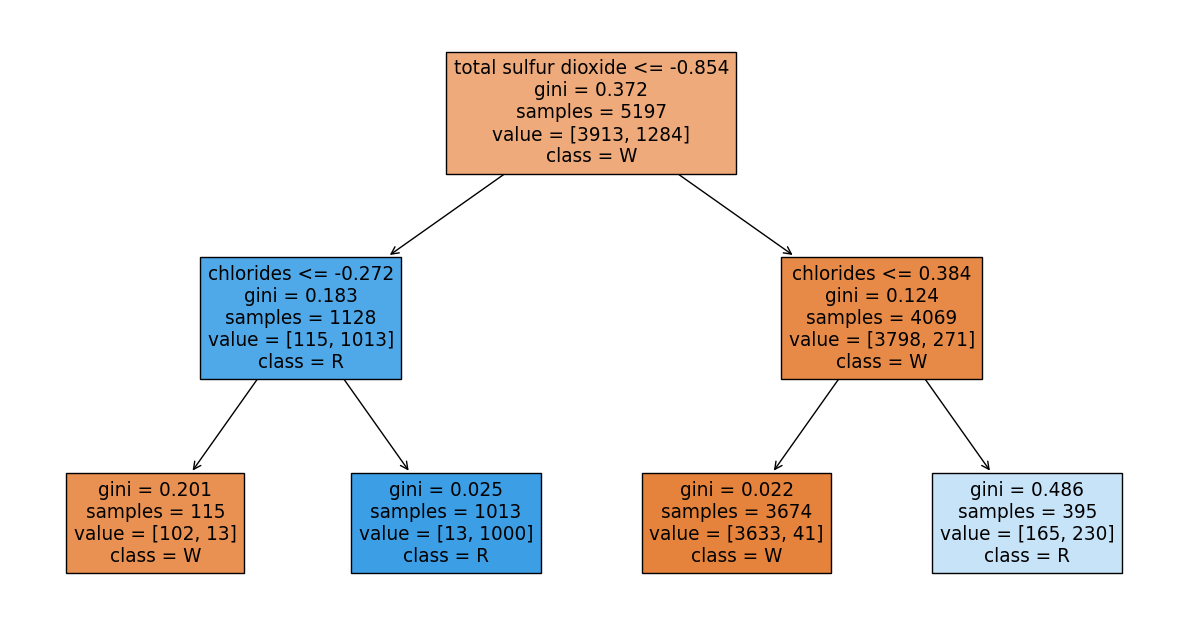

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize = (15, 8))
_ = tree.plot_tree(wine_tree, feature_names = list(X_train.columns), class_names = ['W', 'R'], filled = True)

In [21]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [22]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
 13  taste                 6497 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 761.4 KB


In [23]:
X = wine.drop(['taste'], axis = 1)
y = wine['taste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=13)

In [24]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train_acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train_acc:  1.0
Test Acc:  1.0


In [25]:
X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [26]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)
print('Train_acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train_acc:  0.7294593034442948
Test Acc:  0.7161538461538461


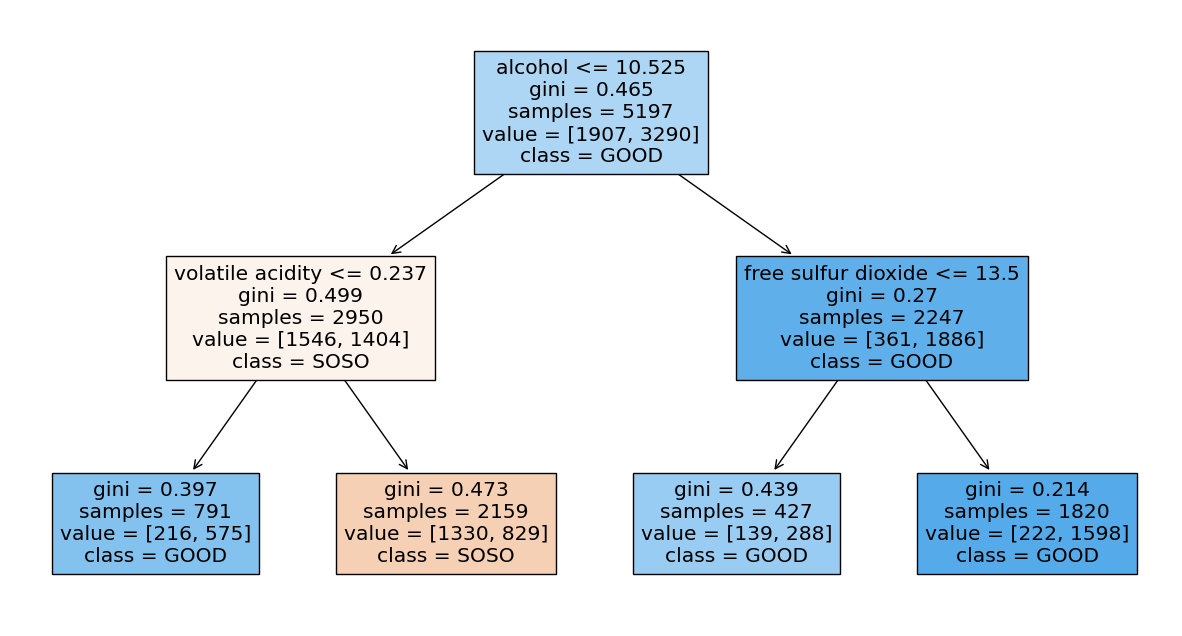

In [27]:
fig = plt.figure(figsize = (15, 8))
_ = tree.plot_tree(wine_tree, feature_names = list(X_train.columns), class_names = ['SOSO', 'GOOD'], filled = True)